# Friendship and inheritance

## Friend functions

In principle, private and protected members of a class cannot be accessed from outside the same class in which they are declared. However, this rule does not apply to "friends".

Friends are functions or classes declared with the friend keyword.

A non-member function can access the private and protected members of a class if it is declared a friend of that class. That is done by including a declaration of this external function within the class and preceding it with the keyword friend.

In the example below, the duplicate function is a friend of the `class` Rectangle. Therefore, function duplicate can access the members' width and height (which are private) of different objects of type Rectangle. Notice though that neither in the declaration of duplicate nor in its later use in main, function duplicate is considered a member of class Rectangle.


In [ ]:
class Rectangle {
    int width, height;
  public:
    Rectangle() {}
    Rectangle (int x, int y) : width(x), height(y) {}
    int area() {return width * height;}
    friend Rectangle duplicate (const Rectangle&);
};

Rectangle duplicate (const Rectangle& param)
{
  Rectangle res;
  res.width = param.width*2;
  res.height = param.height*2;
  return res;
}

int main () {
  Rectangle foo;
  Rectangle bar (2,3);
  foo = duplicate (bar);
  std::cout << foo.area() << '\n';
  return 0;
}

## Friend classes

Similar to friend functions, a friend class is a class whose members have access to the private or protected members of another class.

In this example, class Rectangle is a friend of class Square allowing Rectangle's member functions to access private and protected members of Square. More concretely, Rectangle accesses the member variable Square::side, which describes the side of the square.

In [ ]:
class Square;

class Rectangle {
    int width, height;
  public:
    int area ()
      {return (width * height);}
    void convert (Square a);
};

class Square {
  friend class Rectangle;
  private:
    int side;
  public:
    Square (int a) : side(a) {}
};

void Rectangle::convert (Square a) {
  width = a.side;
  height = a.side;
}
  
int main () {
  Rectangle rect;
  Square sqr (4);
  rect.convert(sqr);
  std::cout << rect.area();
  return 0;
}

## Inheritance between classes

Classes in C++ can be extended, creating new classes which retain characteristics of the base class. This process, known as inheritance, involves a *base class* and a *derived class*: The *derived class* inherits the members of the base class, on top of which it can add its members.

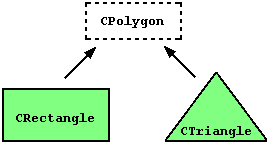

Classes that are derived from others inherit all the accessible members of the base class. That means that if a base class includes a member A and we derive a class from it with another member called B, the derived class will contain both member A and member B.

The inheritance relationship of two classes is declared in the derived class. Derived class definitions use the following syntax:

```c++
class derived_class_name: public base_class_name
{ /*...*/ };
```

Where derived_class_name is the name of the derived class and base_class_name is the name of the class on which it is based. The public access specifier may be replaced by any one of the other access specifiers (protected or private). This access specifier limits the most accessible level for the members inherited from the base class: The members with a more accessible level are inherited with this level instead, while the members with an equal or more restrictive access level keep their restrictive level in the derived class.

We can summarize the different access types according to which functions can access them in the following way:

<p>
<table class="boxed">
<tbody><tr><th>Access</th><th><code>public</code></th><th><code>protected</code></th><th><code>private</code></th></tr>
<tr><td>members of the same class</td><td class="yes">yes</td><td class="yes">yes</td><td class="yes">yes</td></tr>
<tr><td>members of derived class</td><td class="yes">yes</td><td class="yes">yes</td><td class="no">no</td></tr>
<tr><td>not members</td><td class="yes">yes</td><td class="no">no</td><td class="no">no</td></tr>
</tbody></table>
</p>

Where "not members" represents any access from outside the class, such as from main, from another class, or a function.


In [ ]:
class Polygon {
    protected:
      int width, height;
    public:
      void set_values (int a, int b)
        { width=a; height=b;}
   };
  
  class Rectangle: public Polygon {
    public:
      int area ()
        { return width * height; }
   };
  
  class Triangle: public Polygon {
    public:
      int area ()
        { return width * height / 2; }
    };
    
  int main () {
    Rectangle rect;
    Triangle trgl;
    rect.set_values (4,5);
    trgl.set_values (4,5);
    std::cout << rect.area() << '\n';
    std::cout << trgl.area() << '\n';
    return 0;
  }

## Multiple inheritance

A class may inherit from more than one class by simply specifying more base classes, separated by commas, in the list of a class's base classes (i.e., after the colon). For example, if the program had a specific class to print on screen called Output, and we wanted our classes Rectangle and Triangle to also inherit its members in addition to those of Polygon we could write:

```c++
class Rectangle: public Polygon, public Output;
class Triangle: public Polygon, public Output; 
```

Here is the complete example:


In [ ]:
class Polygon {
    protected:
      int width, height;
    public:
      Polygon (int a, int b) : width(a), height(b) {}
  };
  
  class Output {
    public:
      static void print (int i);
  };
  
  void Output::print (int i) {
    std::cout << i << '\n';
  }
  
  class Rectangle: public Polygon, public Output {
    public:
      Rectangle (int a, int b) : Polygon(a,b) {}
      int area ()
        { return width*height; }
  };
  
  class Triangle: public Polygon, public Output {
    public:
      Triangle (int a, int b) : Polygon(a,b) {}
      int area ()
        { return width*height/2; }
  };
    
  int main () {
    Rectangle rect (4,5);
    Triangle trgl (4,5);
    rect.print (rect.area());
    Triangle::print (trgl.area());
    return 0;
  }